In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
import pytesseract # This is the TesseractOCR Python library
# Set Tesseract CMD path to the location of tesseract.exe file
pytesseract.pytesseract.tesseract_cmd = 'C:/Users/Hi/AppData/Local/pip/cache/wheels/c6/3a/30/877d14dc50fb68f107b18247a31db742518c6f74f64de8dde8'

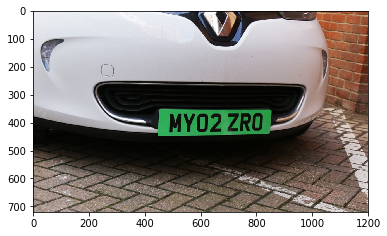

In [2]:
# Read car image and convert color to RGB
carplate_img = cv2.imread('car1.jpg')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)
plt.imshow(carplate_img_rgb)

In [3]:
carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [4]:
# Setup function to detect car plate
def carplate_detect(image):
    carplate = image.copy() 
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate,scaleFactor=1.1, minNeighbors=3)
    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate, (x,y), (x+w,y+h), (255,0,0), 5) 
    return carplate

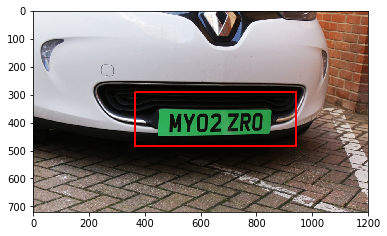

In [5]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
plt.imshow(detected_carplate_img)

In [6]:
# Create function to retrieve only the car plate region itself
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5)
    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+25:y+h-20 ,x+65:x+w-20] # Adjusted to extract specific region of interest i.e. 
        #car license plate
        
    return carplate_img

In [7]:
# Enlarge image for further processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

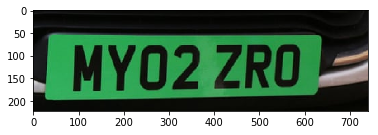

In [8]:
# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img)

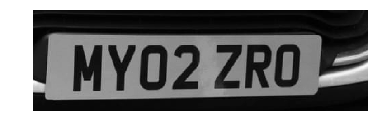

In [9]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray')


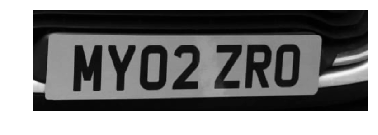

In [10]:
# Apply median blur
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # kernel size 3
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray')

In [11]:
# Display the text extracted from the car plate
number_plate = pytesseract.image_to_string(carplate_extract_img_gray_blur, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
#number_plate = pytesseract.image_to_boxes(carplate_extract_img_gray_blur)

PermissionError: [WinError 5] Access is denied

In [ ]:
number = number_plate[:10]